## Machine Learning for Computer Vision, SoSe 2022

### Praktikum 7 - Alexnet Classification

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np

import glob
import cv2

import os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

import random
import matplotlib.pyplot as plt

In [45]:
filelist_A =  'images/saved_images/A/'
filelist_B = 'images/saved_images/B/'
IMG_HEIGHT = 100
IMG_WIDTH = 100

In [46]:
x_A_images = [x for x in sorted(os.listdir(filelist_A)) if x[-4:] == '.jpg']
x_A = np.empty((len(x_A_images), IMG_HEIGHT, IMG_WIDTH,3), dtype='float32')
y_A = np.ones((x_A.shape[0],1))

In [47]:
y_A.shape

(97, 1)

In [48]:
for i, name in enumerate(x_A_images):
    im = cv2.imread(filelist_A + name, cv2.IMREAD_UNCHANGED)
    #im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY).astype('float32')
    #im = (im - np.min(im)) / (np.max(im) - np.min(im))
    x_A[i] = cv2.resize(im, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)

In [49]:
x_B_images = [x for x in sorted(os.listdir(filelist_B)) if x[-4:] == '.jpg']
x_B = np.empty((len(x_B_images), IMG_HEIGHT, IMG_WIDTH,3), dtype='float32')
y_B = np.zeros((x_B.shape[0],1))

In [50]:
for i, name in enumerate(x_B_images):
    im = cv2.imread(filelist_B + name, cv2.IMREAD_UNCHANGED)
    #im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY).astype('float32')
    #im = (im - np.min(im)) / (np.max(im) - np.min(im))
    x_B[i] = cv2.resize(im, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)

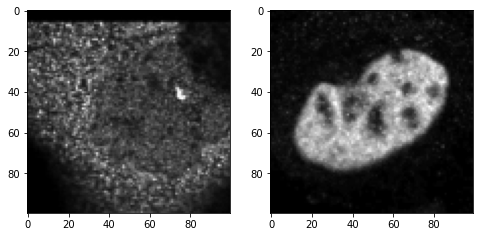

In [51]:
fig, ax = plt.subplots(1,2, figsize = (8,4))

ax[0].imshow(cv2.cvtColor(x_A[3], cv2.COLOR_BGR2GRAY), cmap='gray')
ax[1].imshow(cv2.cvtColor(x_B[3], cv2.COLOR_BGR2GRAY), cmap='gray')
plt.show()

In [52]:
#concatenate the two classes for training and validation, x contains the image, y contains the labels (0 or 1)
x = np.concatenate((x_B, x_A))
y = np.concatenate((y_B, y_A))

In [53]:
x[0].shape

(100, 100, 3)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train_orig, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y)

In [55]:
y_train = to_categorical(y_train_orig)

In [73]:
# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(IMG_HEIGHT,IMG_WIDTH,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(IMG_HEIGHT*IMG_WIDTH*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 23, 23, 96)        34944     
                                                                 
 activation_59 (Activation)  (None, 23, 23, 96)        0         
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 12, 12, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_50 (Bat  (None, 12, 12, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_61 (Conv2D)          (None, 12, 12, 256)       2973952   
                                                                 
 activation_60 (Activation)  (None, 12, 12, 256)     

In [74]:
# Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
x_train[0].shape

(100, 100, 3)

In [76]:
# Train
model.fit(x_train, y_train, batch_size=16, epochs=70, verbose=1, validation_split=0.1, shuffle=True)

Epoch 1/70
7/7 [==============================] - 3s 307ms/step - loss: 1.0174 - accuracy: 0.7576 - val_loss: 179.7272 - val_accuracy: 0.7500
Epoch 2/70
7/7 [==============================] - 2s 272ms/step - loss: 2.6003 - accuracy: 0.6162 - val_loss: 526.4632 - val_accuracy: 0.2500
Epoch 3/70
7/7 [==============================] - 2s 269ms/step - loss: 1.1773 - accuracy: 0.7475 - val_loss: 269.7888 - val_accuracy: 0.2500
Epoch 4/70
7/7 [==============================] - 2s 269ms/step - loss: 0.8878 - accuracy: 0.7374 - val_loss: 1555.4137 - val_accuracy: 0.2500
Epoch 5/70
7/7 [==============================] - 2s 274ms/step - loss: 0.5399 - accuracy: 0.7273 - val_loss: 623.0459 - val_accuracy: 0.2500
Epoch 6/70
7/7 [==============================] - 2s 276ms/step - loss: 0.6271 - accuracy: 0.7677 - val_loss: 19.5687 - val_accuracy: 0.5833
Epoch 7/70
7/7 [==============================] - 2s 288ms/step - loss: 0.4794 - accuracy: 0.7778 - val_loss: 103.5523 - val_accuracy: 0.2500
Epoch 

Epoch 59/70
7/7 [==============================] - 2s 322ms/step - loss: 0.1898 - accuracy: 0.9394 - val_loss: 6.3652 - val_accuracy: 0.7500
Epoch 60/70
7/7 [==============================] - 2s 305ms/step - loss: 0.3902 - accuracy: 0.8384 - val_loss: 6.3468 - val_accuracy: 0.7500
Epoch 61/70
7/7 [==============================] - 2s 319ms/step - loss: 0.4233 - accuracy: 0.8485 - val_loss: 3.6108 - val_accuracy: 0.8333
Epoch 62/70
7/7 [==============================] - 2s 304ms/step - loss: 0.3617 - accuracy: 0.8081 - val_loss: 3.1469 - val_accuracy: 0.7500
Epoch 63/70
7/7 [==============================] - 2s 307ms/step - loss: 0.3409 - accuracy: 0.8788 - val_loss: 1.9426 - val_accuracy: 0.7500
Epoch 64/70
7/7 [==============================] - 2s 319ms/step - loss: 0.1868 - accuracy: 0.9394 - val_loss: 2.5545 - val_accuracy: 0.7500
Epoch 65/70
7/7 [==============================] - 2s 319ms/step - loss: 0.3231 - accuracy: 0.8990 - val_loss: 2.0340 - val_accuracy: 0.7500
Epoch 66/70
7

In [77]:
# Test
y_pred = np.argmax(model.predict(x_test), axis=-1)
cmat = confusion_matrix(y_test, y_pred)

In [78]:
cmat

array([[14,  5],
       [ 4, 25]])

In [79]:
# Train
y_pred_train = np.argmax(model.predict(x_train), axis=-1)
cmat_train = confusion_matrix(y_train_orig, y_pred_train)

In [80]:
cmat_train

array([[41,  2],
       [11, 57]])